# 1) Delivery_time

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
dataset = pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes



- Inferences : There are no any null values.

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

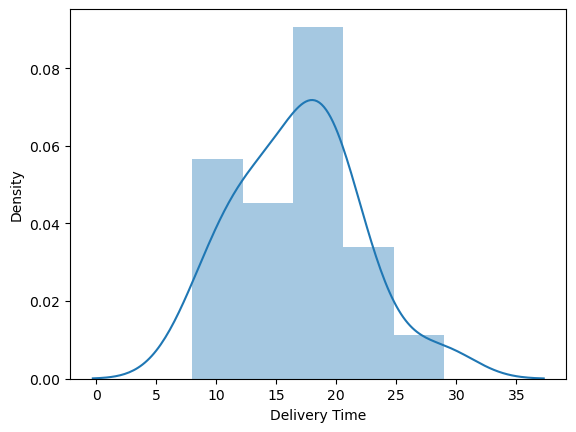

In [4]:
#Visualization
sns.distplot(dataset['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

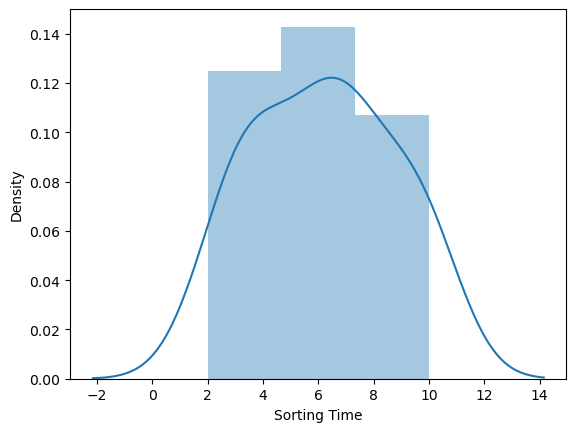

In [6]:
sns.distplot(dataset['Sorting Time'])

In [19]:
np.log(dataset)

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


Text(0.5, 1.0, 'Log-Transformed Data')

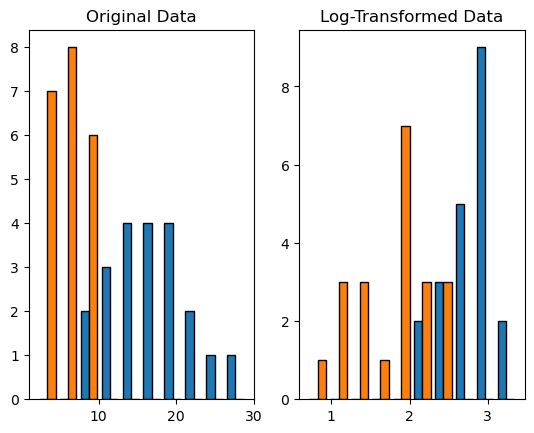

In [18]:
dataset_log = np.log(dataset)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')


In [7]:
#Feature Engineering

In [14]:
#Renaming the columns
dataset = dataset.rename({'Delivery Time':'delivery_time', 
                         'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
#Correlation analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

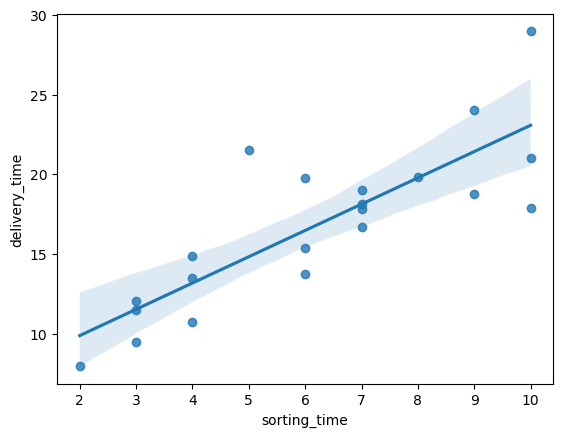

In [16]:
#Regression plot
sns.regplot(dataset['sorting_time'],dataset['delivery_time'])

# Model Building

In [18]:
#Import statsmodel
import statsmodels.formula.api as smf

In [19]:
#Train the data
model = smf.ols('delivery_time~sorting_time', data=dataset).fit() 

In [20]:
model

# Testing the Model

In [21]:
#Model parameters

In [22]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [23]:
#Print values for t value and p value


print(f"The t value is {model.tvalues}\np-value is {model.pvalues}")

The t value is Intercept       3.823349
sorting_time    6.387447
dtype: float64
p-value is Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [24]:
# Finding r2 value

print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


# Model Prediction

In [29]:
#Manual prediction
delivery_time = (6.582734) + (1.649020)*(7)
delivery_time

18.125874

In [30]:
#Automatic prediction
newdata = pd.Series([7,9])

newdata = pd.DataFrame(newdata, columns=['sorting_time'])

In [26]:
newdata

,sorting_time
0,7
1,9


In [31]:
model.predict(newdata)

0    18.125873
1    21.423913
dtype: float64

# 2) Salary_hike

In [21]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
#EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


- Inferences : There are no null values.

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

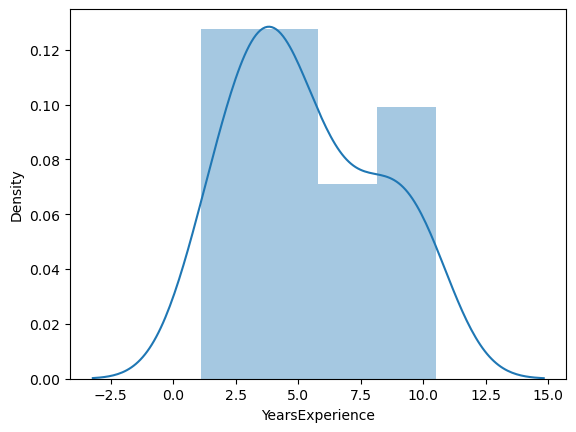

In [23]:
#Visualization
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

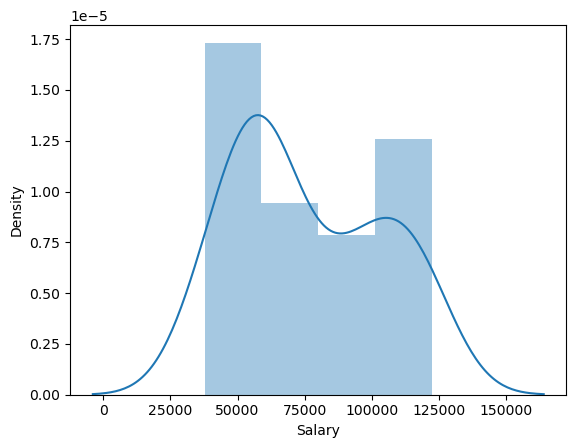

In [24]:
sns.distplot(dataset['Salary'])

In [25]:
np.log(dataset)

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


Text(0.5, 1.0, 'Log-Transformed Data')

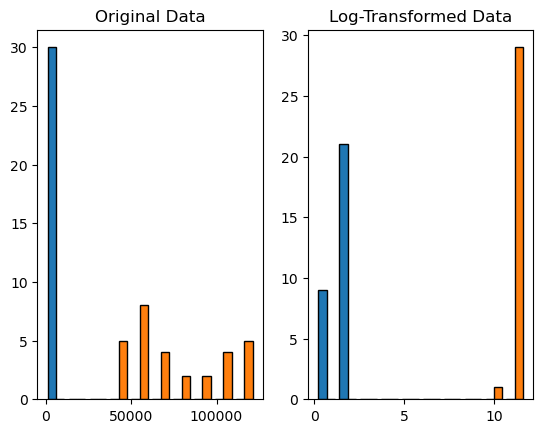

In [26]:
dataset_log = np.log(dataset)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')


In [38]:
#Correlation analysis
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

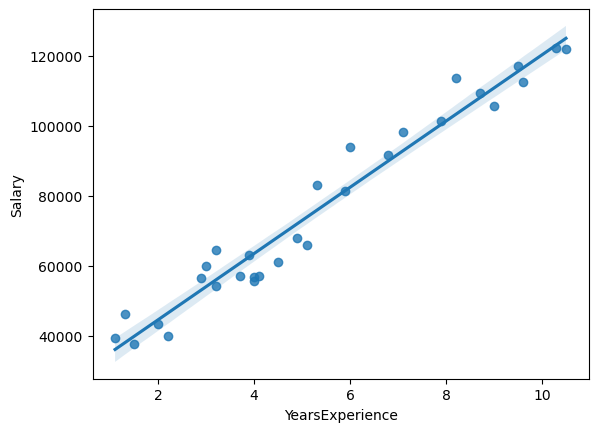

In [40]:
#Regression plot
sns.regplot(dataset['YearsExperience'],dataset['Salary'])

# Model Building

In [41]:
#Import statsmodel
import statsmodels.formula.api as smf

In [43]:
#Train the data
model = smf.ols('Salary~YearsExperience', data=dataset).fit() 

In [44]:
model

# Testing the model

In [45]:
#model parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [46]:
#Print values for t value and p value


print(f"The t value is {model.tvalues}\np-value is {model.pvalues}")

The t value is Intercept          11.346940
YearsExperience    24.950094
dtype: float64
p-value is Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [47]:
# Finding r2 value

print(model.rsquared, model.rsquared_adj)

0.9569566641435086 0.9554194021486339


# Model Prediction

In [48]:
#Line equation(Manual Prediction)
y = 9449.96*7+25792.2
y

91941.92

In [52]:
#Automatic Prediction
newdata = pd.Series([7,9])

newdata = pd.DataFrame(newdata, columns=['YearsExperience'])

In [53]:
newdata

,YearsExperience
0,7
1,9


In [54]:
model.predict(newdata)

0     91941.936449
1    110841.861092
dtype: float64